In [1]:
from base_types import DataType, DataElements
from data import Data

usd_name = 'BUSD'
token_name = 'BTC'
symbol = token_name + usd_name

data = Data(symbol, DataType.INTERVAL_1MINUTE,
            num=4000, is_futures=True)
            
close = data.data['close']

2000
[-6.24277886e-12+0.j         -7.54027502e+00-4.3102846j
  2.99428343e+00-2.85253414j  1.17028474e-01-2.83583054j
  6.81786438e-01-1.1373581j ]


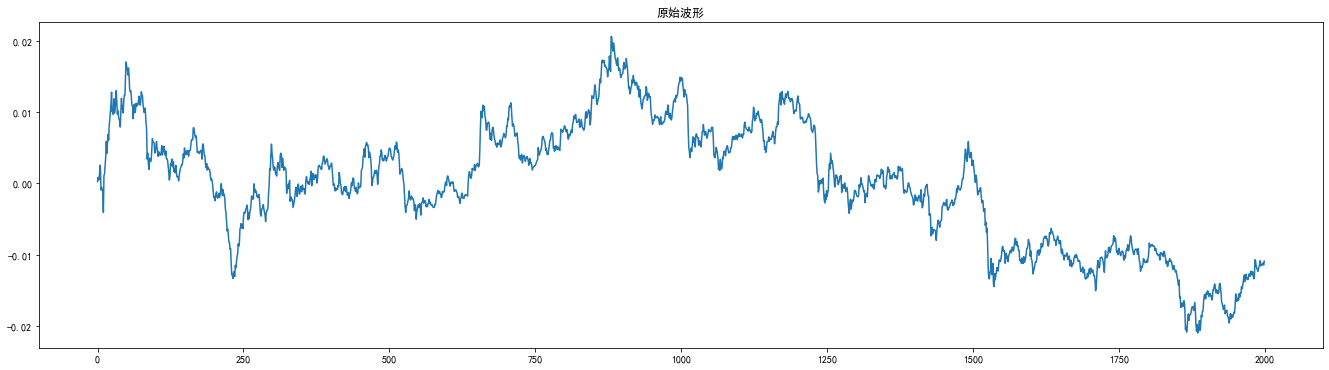

In [20]:
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import numpy as np

# %matplotlib qt5
%matplotlib inline

mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus'] = False       #显示负号

def getSrcAndFft(all, start, end):
    num = end - start

    # x = np.linspace(start, 1, num)     
    x = np.arange(0, num)
    
    #设置需要采样的信号，频率分量有200，400和600
    y = all[start:end]

    ave = y.mean()
    y = (y - ave) / ave
    fft_y = fft(y[:num])
    
    return x, y, fft_y

def show_origin(x, y):
    plt.figure(figsize=(23, 6))
    plt.plot(x, y)   
    plt.title('原始波形')

x, y, fft_y = getSrcAndFft(close, 0, 2000)
show_origin(x, y)
num = len(y)
print(len(fft_y))
print(fft_y[0:5])

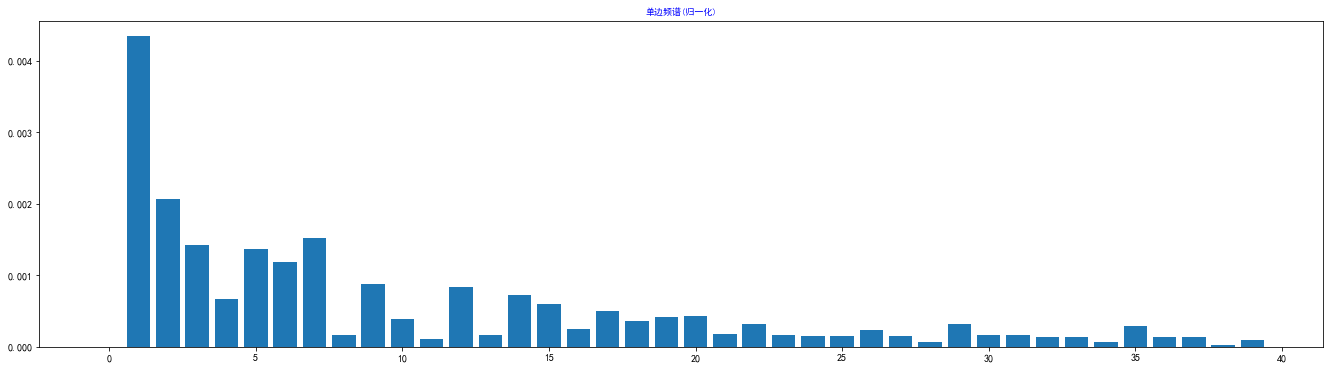

In [6]:
def show_fft_origin(fft_y):
    N = len(fft_y)
    x = np.arange(N)           # 频率个数
    
    abs_y = np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
    angle_y = np.angle(fft_y)              #取复数的角度
    
    plt.figure(figsize=(23, 6))
    plt.plot(x,abs_y)   
    plt.title('双边振幅谱（未归一化）')
    
    plt.figure(figsize=(23, 6))
    plt.plot(x,angle_y)   
    plt.title('双边相位谱（未归一化）')
    plt.show()

# show_fft_origin(fft_y)


def show_fft_norm(fft_y, start, end=None):
    N = len(fft_y)
    x = np.arange(N)           # 频率个数
    abs_y = np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
    normalization_y = abs_y / N            #归一化处理（双边频谱）
    # plt.figure(figsize=(23, 6))
    # plt.plot(x[1:], normalization_y[1:],'g')
    # plt.title('双边频谱(归一化)', fontsize=9, color='green')
    # plt.show()

    half_x = x[range(int(N/2))]                                  #取一半区间
    normalization_half_y = normalization_y[range(int(N/2))]      #由于对称性，只取一半区间（单边频谱）
    plt.figure(figsize=(23, 6))
    # plt.plot(half_x[start:end], normalization_half_y[start:end],'b')
    plt.bar(half_x[start:end], normalization_half_y[start:end])
    plt.title('单边频谱(归一化)', fontsize=9, color='blue')
    plt.show()

show_fft_norm(fft_y, 0, 40)
# 1, 3, 8, 9, 12, 14, 16
# 500, 166.7, 62.5, 55.6, 41.7, 35.7, 31


e:\python_env\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


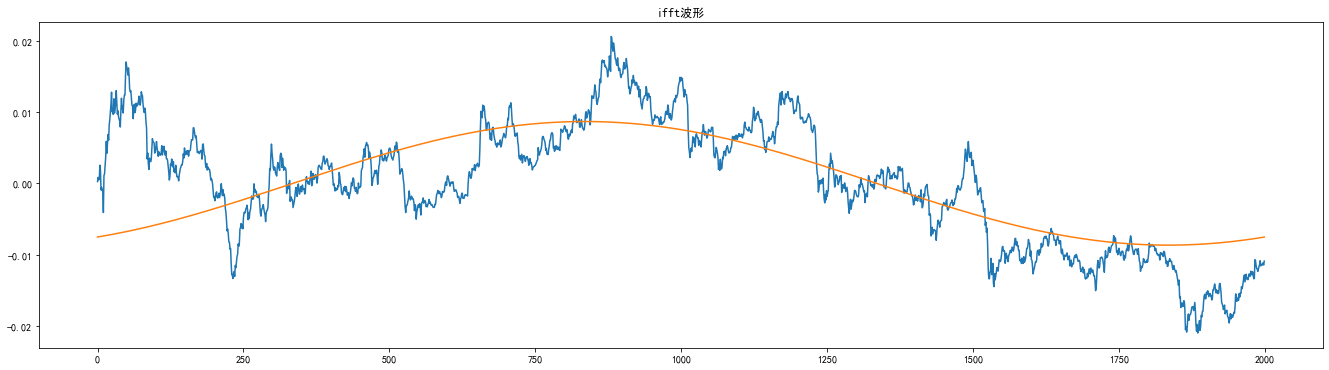

In [23]:
def show_target_freq(x, fft_y2, target_freq):
    # Select target frequency
    N = len(fft_y2)
    largest_freq = 0
    smallest_freq = N // 2  # Included

    fft_y3 = np.zeros(N, dtype=complex)

    for freq in target_freq:
        assert freq <= smallest_freq
        fft_y3[freq] = fft_y2[freq]
        # print(freq, fft_y3[freq])
        if freq == 0:
            continue

        idx = N - freq
        fft_y3[idx] = fft_y2[idx]    # 1 -> N-1
        # print(idx, fft_y3[idx])

    ifft_y = ifft(fft_y3)
    # ifft_y[:10]
    # plt.figure(figsize=(23, 6))
    plt.plot(x[:len(ifft_y)], ifft_y)
    plt.title('ifft波形')

N = len(fft_y)
# target_freq = list(range(10))   # [largest_freq,  smallest_freq]
target_freq = [1]
show_origin(x[:len(fft_y)], y[:len(fft_y)])
show_target_freq(x, fft_y, target_freq)
# show_target_freq(x, fft_y, target_freq + [12])

## 查看不同时刻的频率一致性

将 clsoe 分成 10 段，分别绘制每一段的频谱图，查看一致性

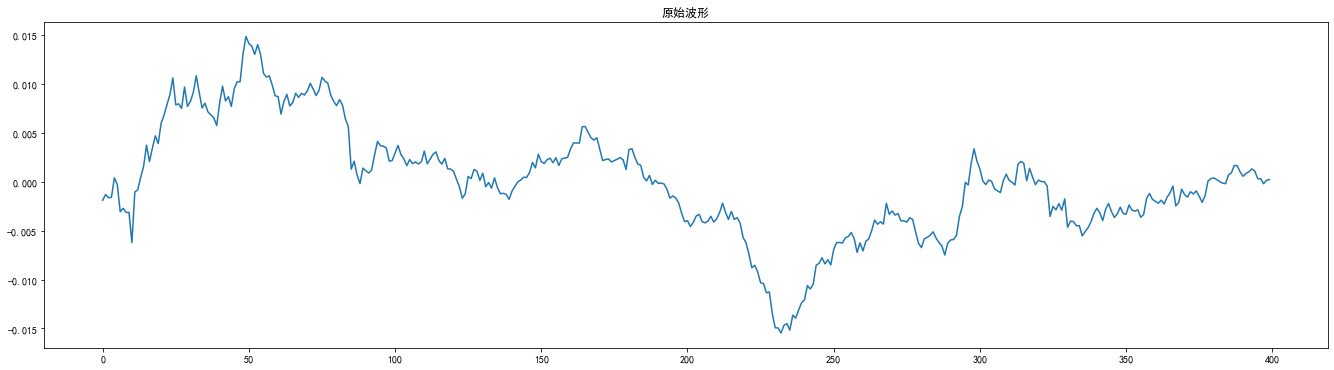

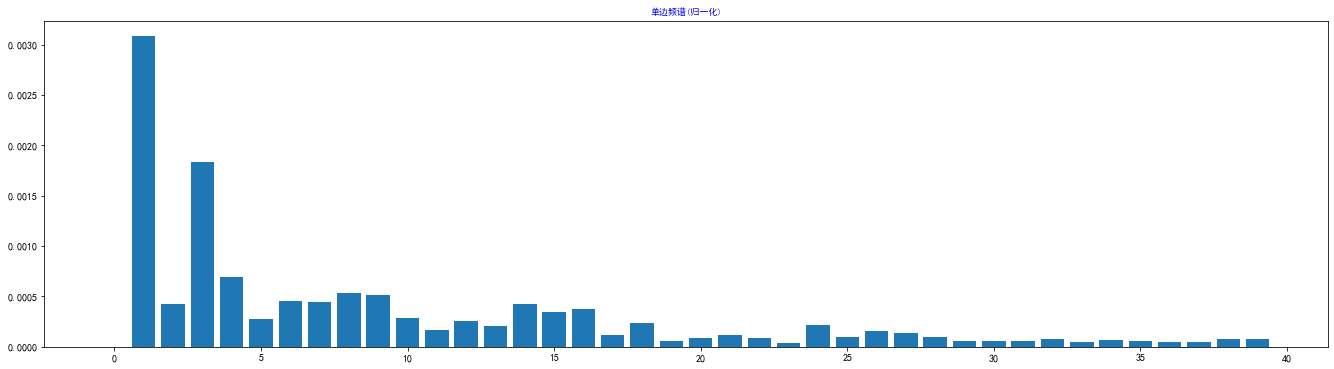

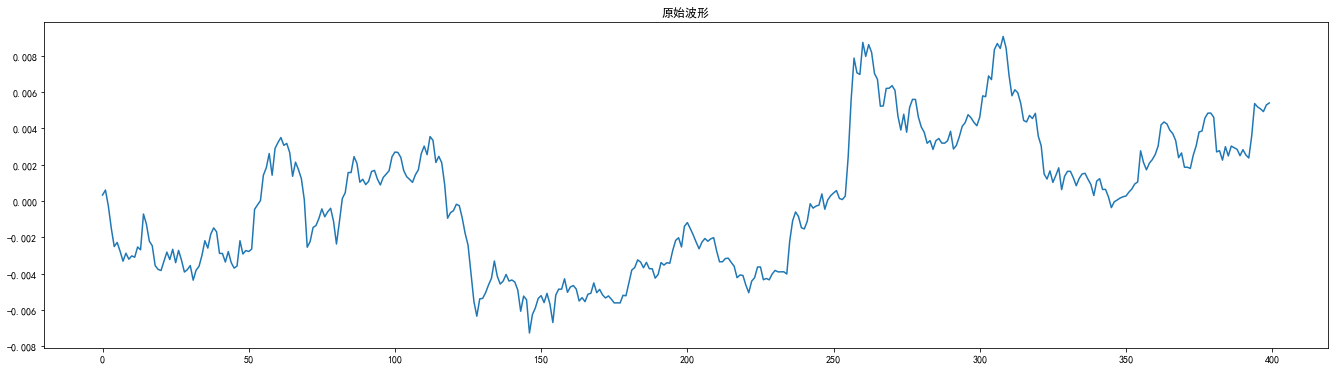

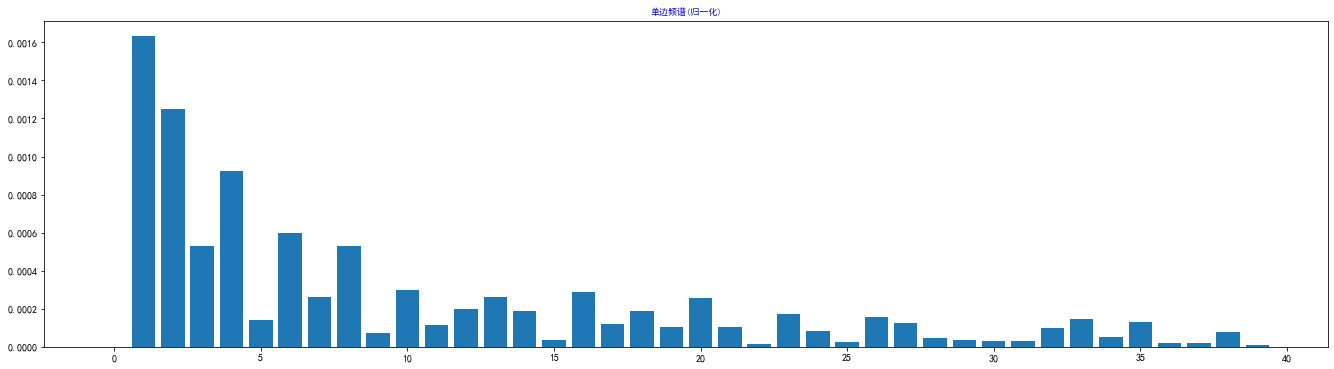

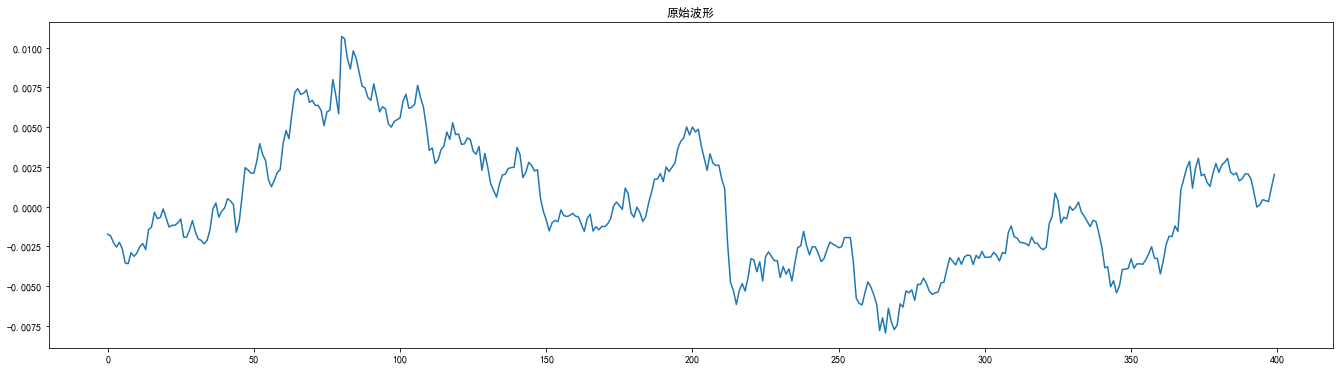

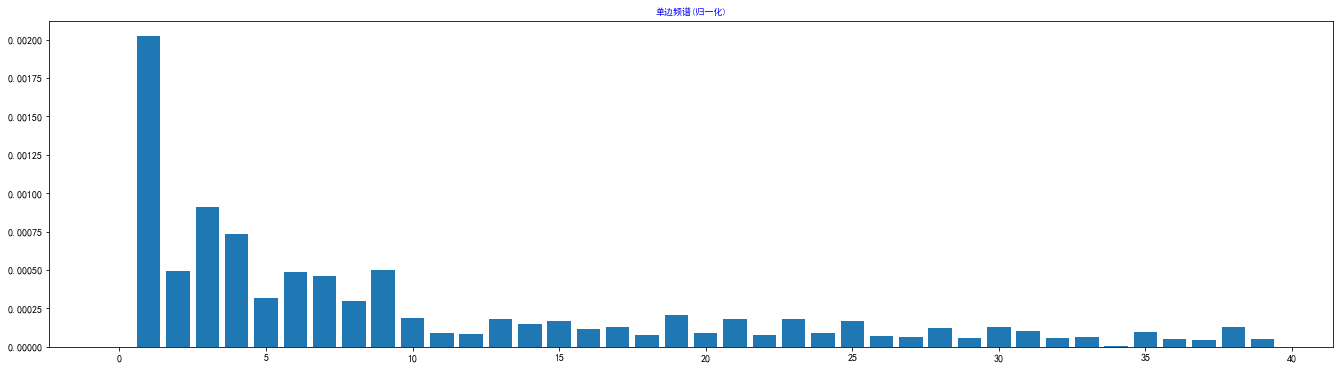

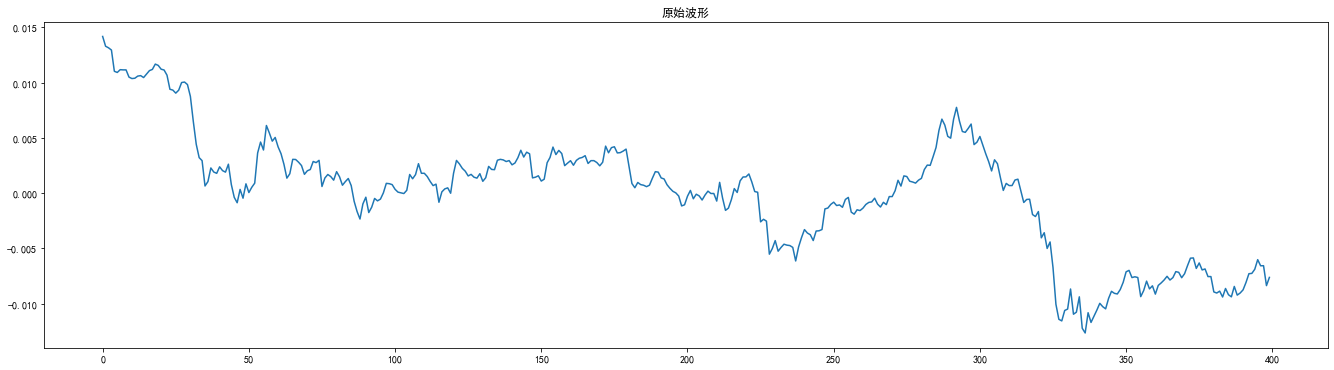

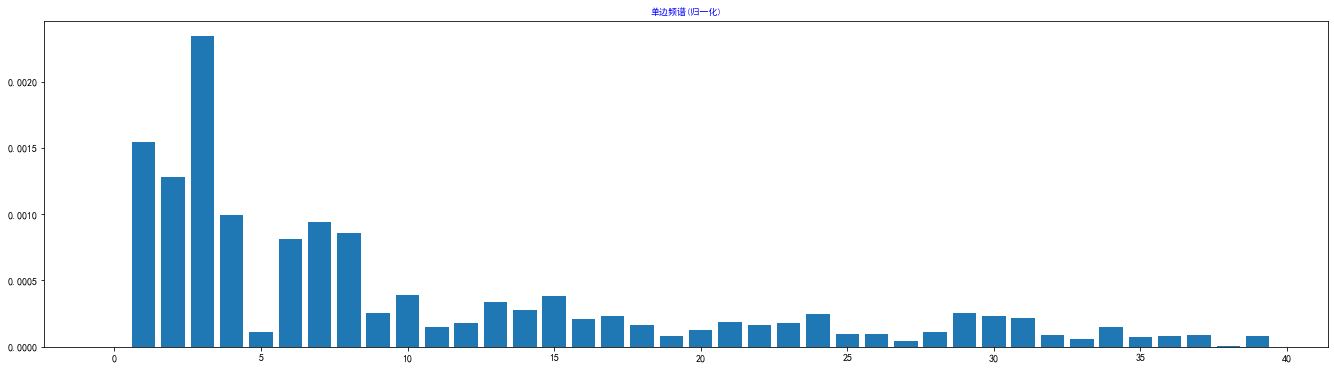

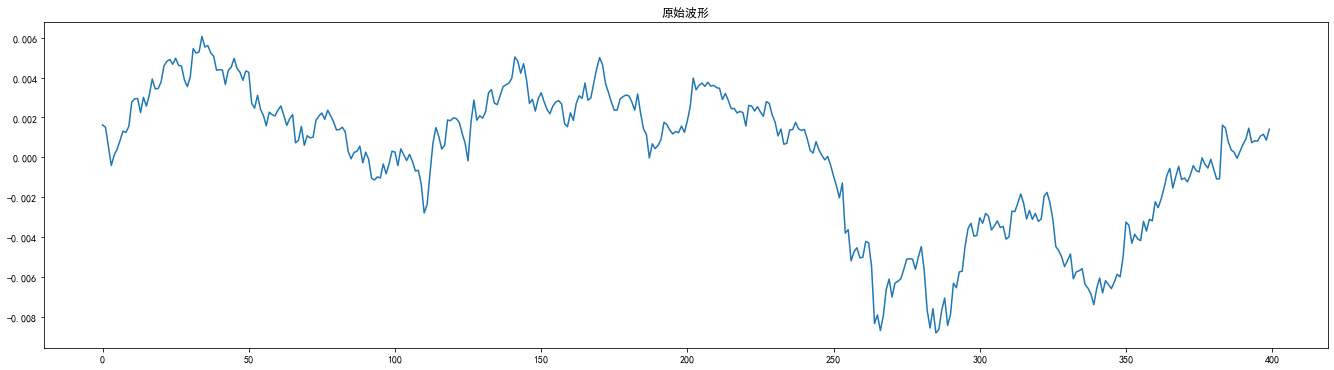

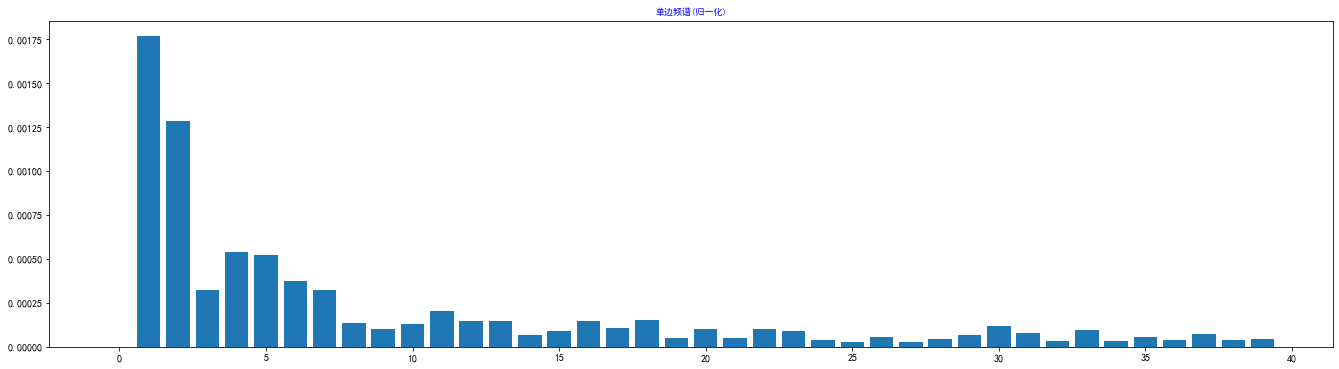

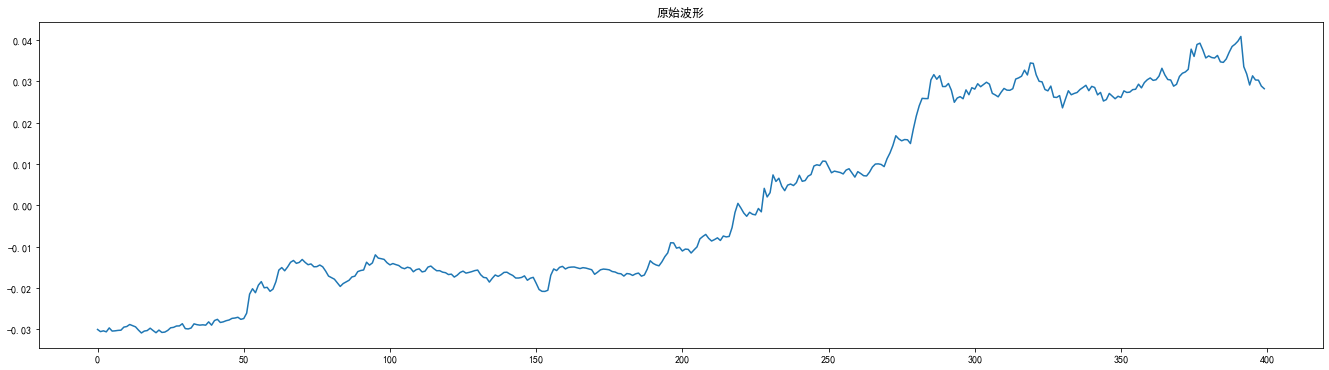

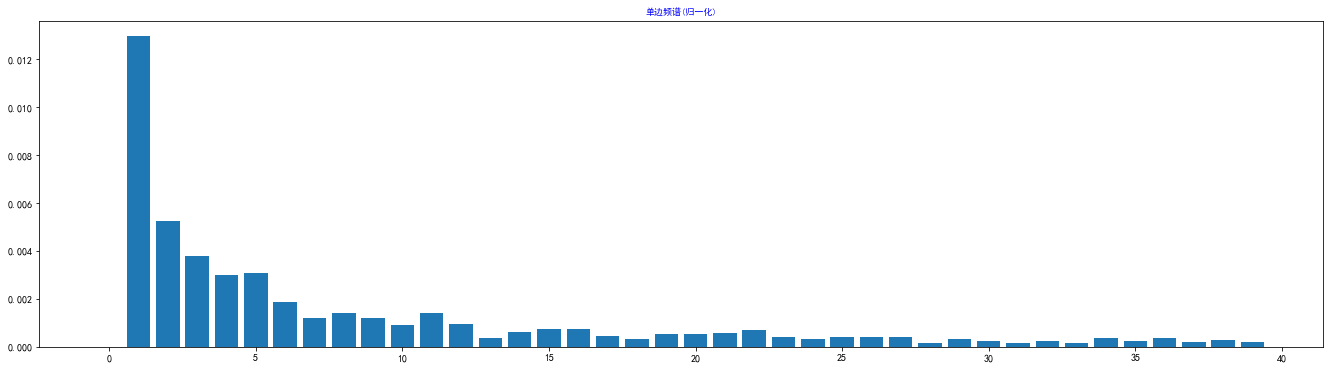

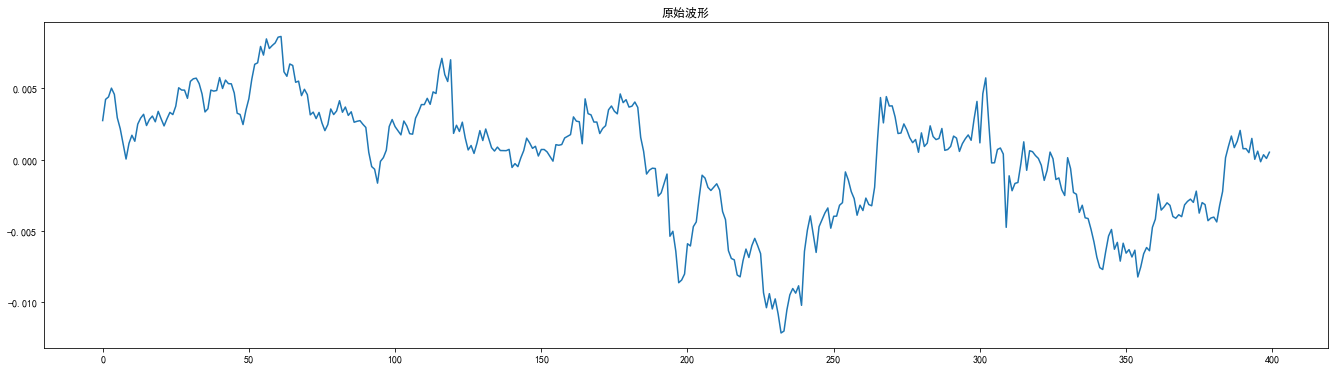

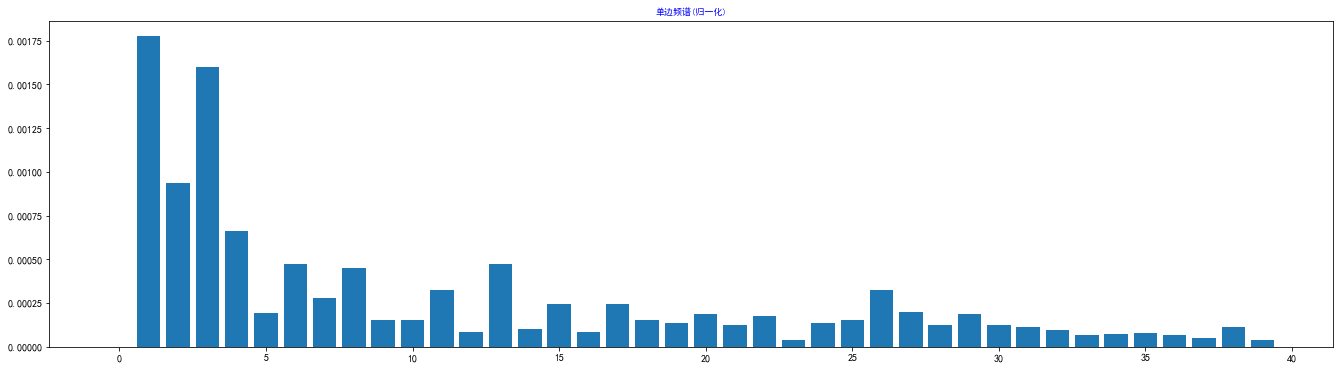

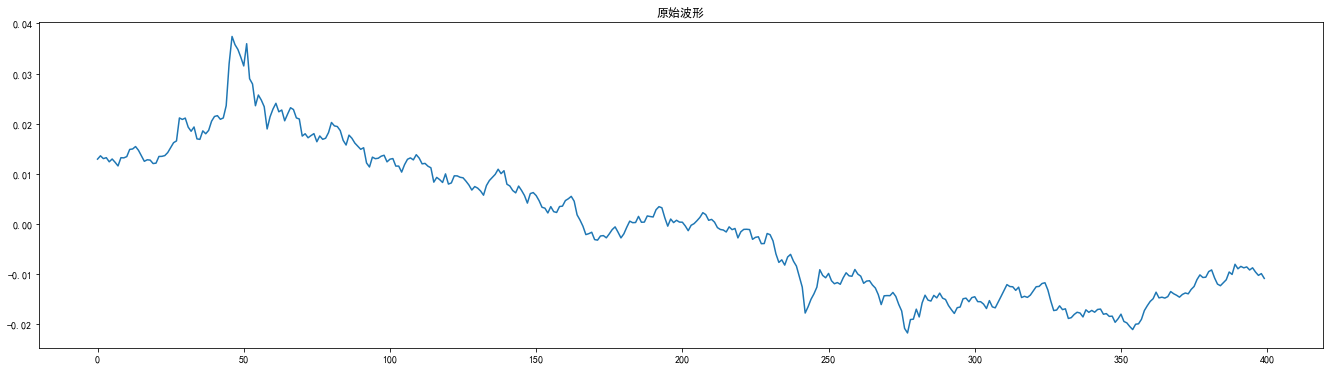

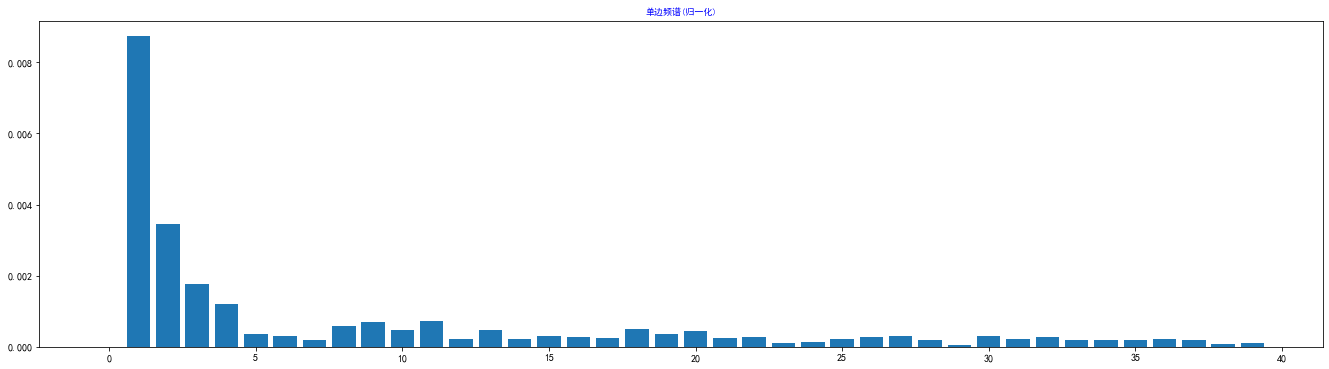

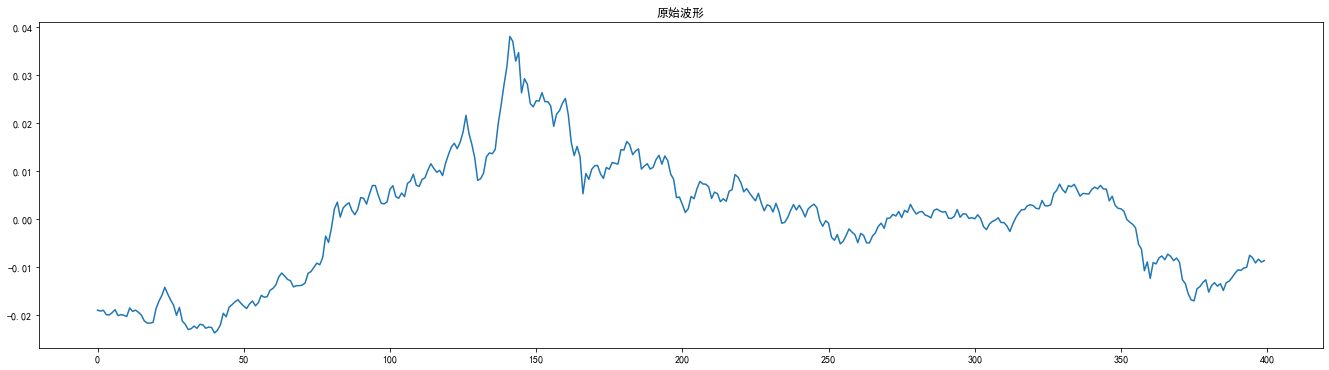

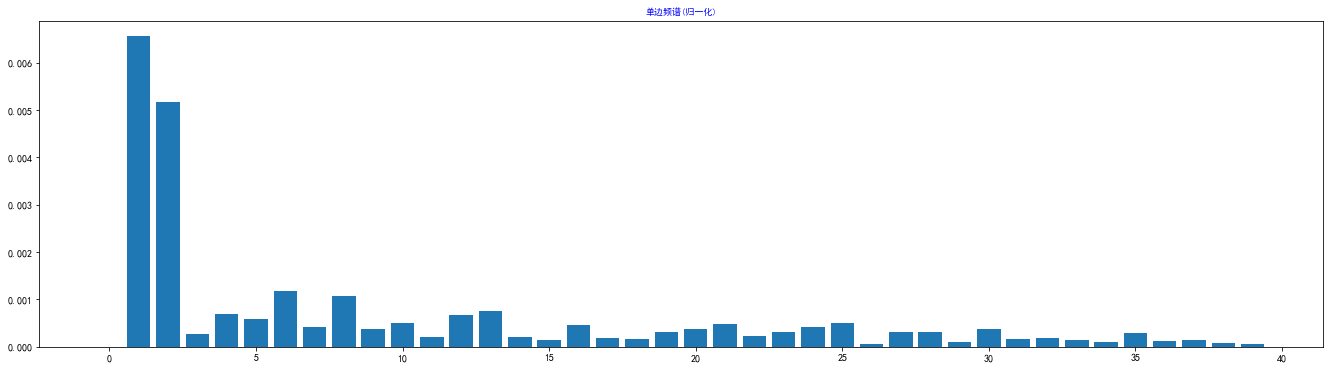

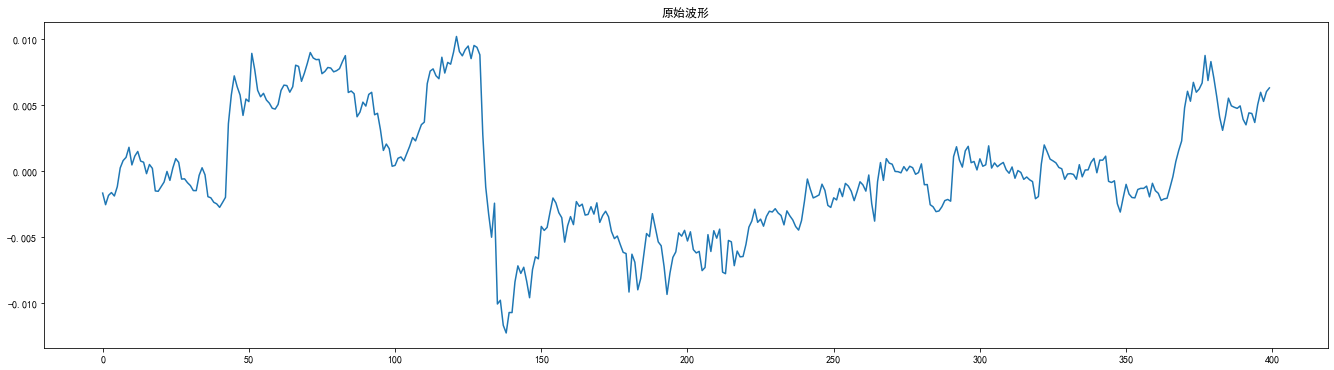

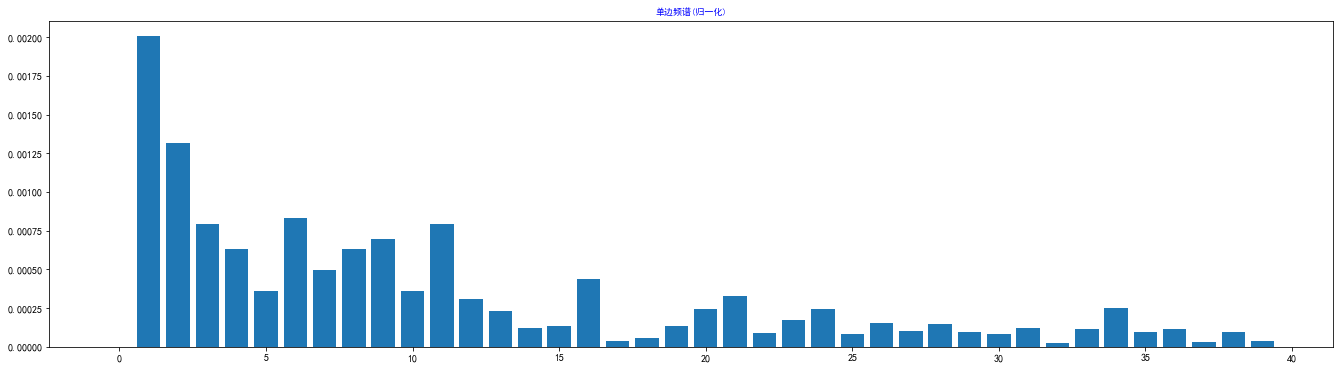

In [22]:
def SplitDraw(all, sliceNum):
    total = len(all)
    test_num = total // sliceNum

    start = 0
    for i in range(10):
        end = start + test_num
        x, y, fft_y = getSrcAndFft(all, start, end)
        show_origin(x, y)
        show_fft_norm(fft_y, 0, 40)
        start = end

SplitDraw(close, 10)
